# **Basic Libraries & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_OG=pd.read_excel('/content/EastWestAirlines.xlsx',header=0,sheet_name=1)

In [3]:
df_OG.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df_OG.shape

(3999, 12)

In [5]:
df_OG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# **Nulls & Duplicates**

In [6]:
df_OG.isnull().sum()

,0
ID,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [7]:
df_OG[df_OG.duplicated()]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [8]:
df_OG=df_OG.drop_duplicates() # Drop duplicated rows

In [9]:
df=df_OG.iloc[:,1:]

In [10]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# **Scaling the Data**

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
df_scaled=sc.fit_transform(df)

In [14]:
df_scaled # scaled all the data in the range of (-3 to 3)

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [15]:
  df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# **Basic Visualization**

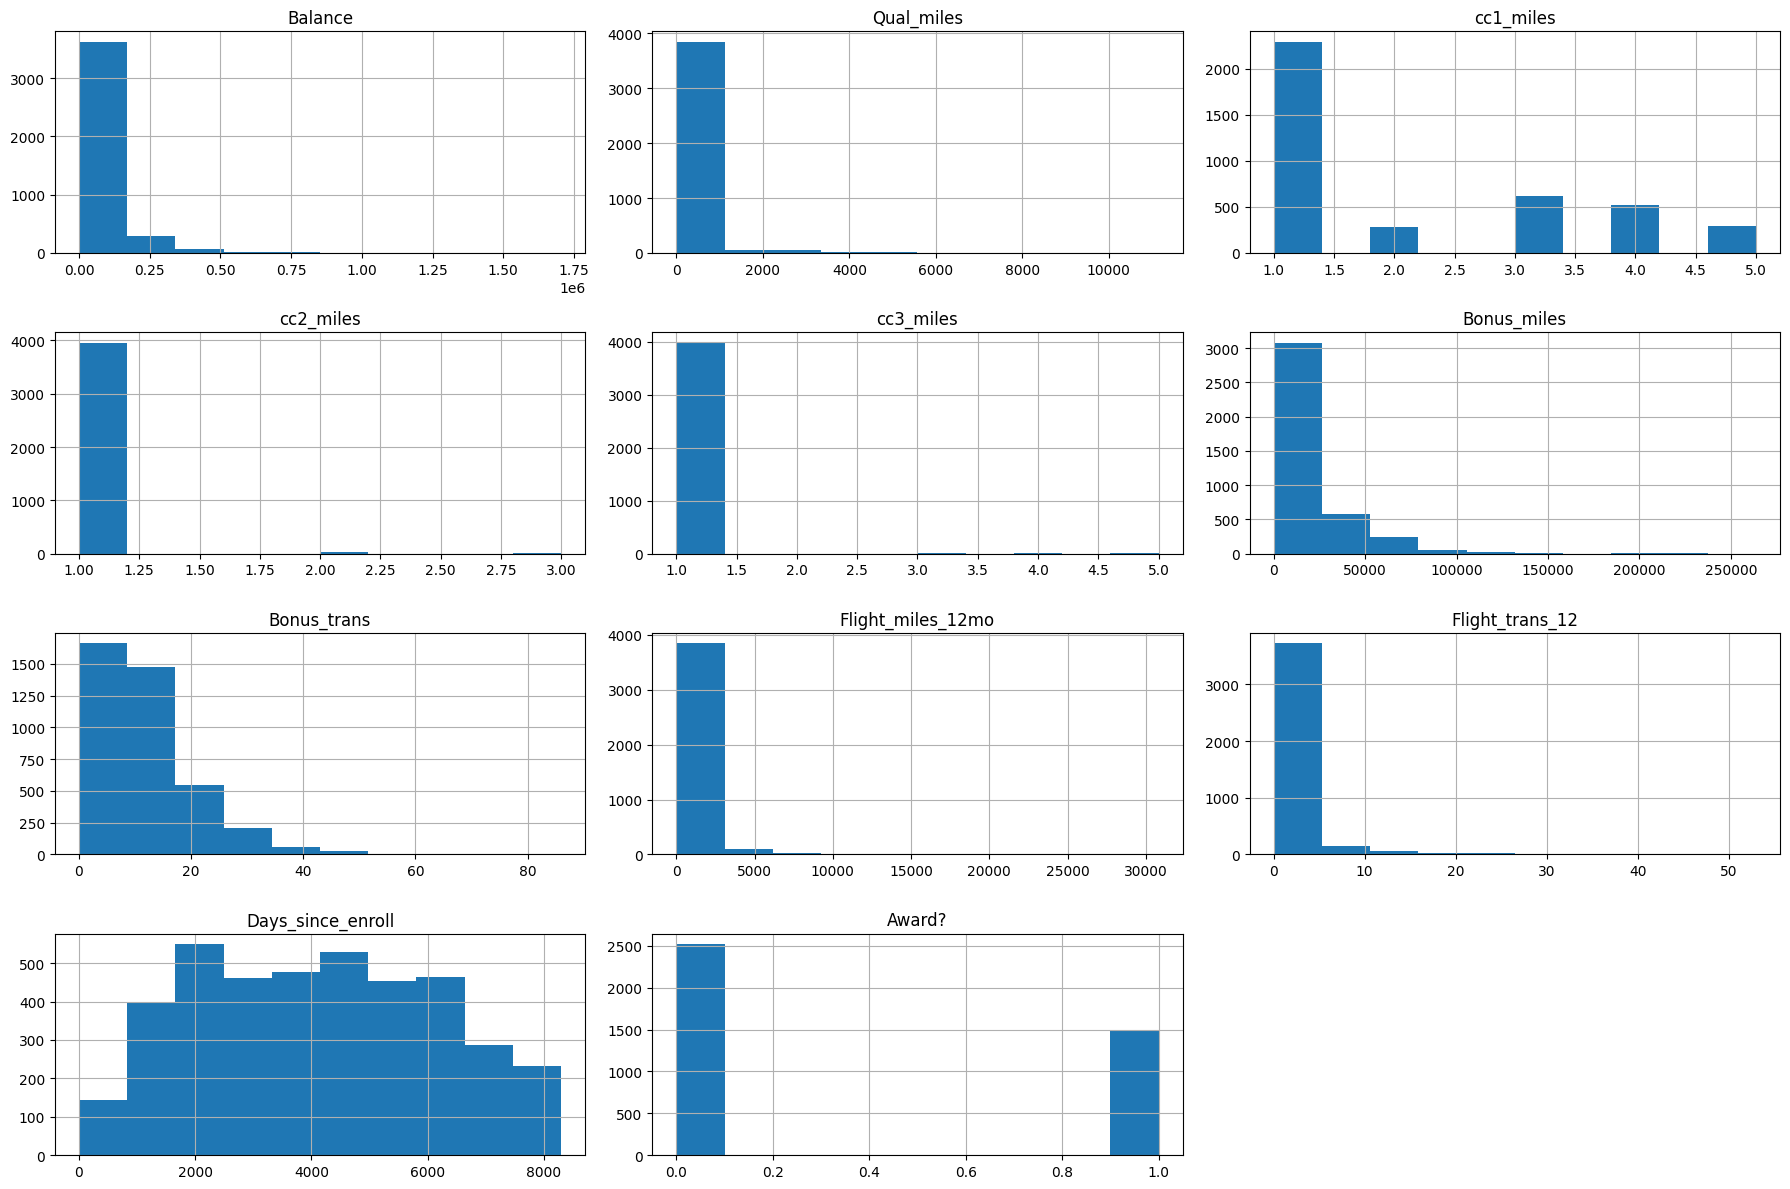

In [16]:
df.hist(figsize=(18,12))
plt.tight_layout()

In [17]:
#sns.pairplot(df)

<Axes: >

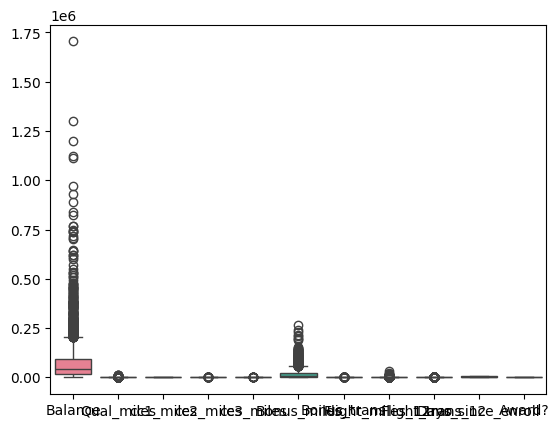

In [18]:
sns.boxplot(df)

<Axes: >

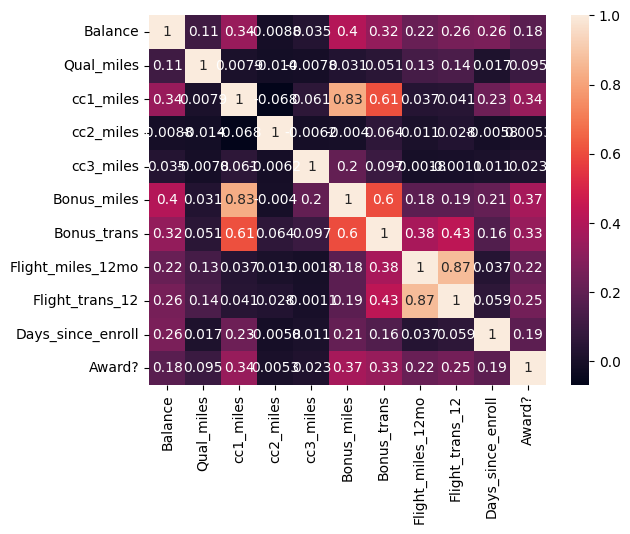

In [19]:
sns.heatmap(df.corr(),annot=True)

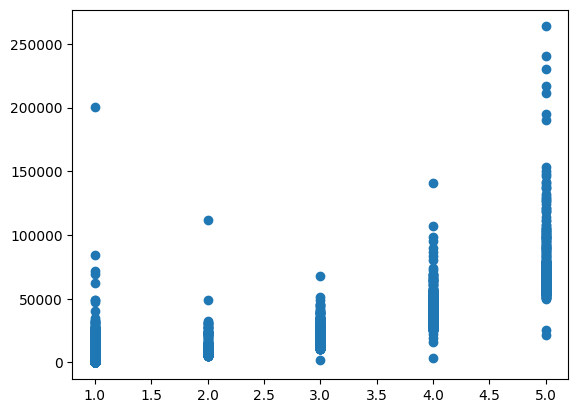

In [20]:
plt.scatter(df['cc1_miles'],df['Bonus_miles'])

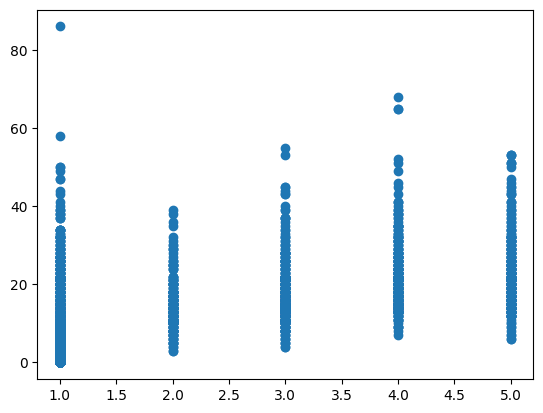

In [21]:
plt.scatter(df['cc1_miles'],df['Bonus_trans'])

In [22]:
def standard(i):
  x=(i-i.mean())/i.std()
  return x

In [23]:
df_standard=standard(df)

In [24]:
df_standard

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


In [25]:
df_standard.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,1.421441e-17,-1.776801e-18,5.685763e-17,2.576362e-16,1.172689e-16,-2.842882e-17,-8.528645e-17,-1.599121e-17,-2.842882e-17,1.705729e-16,7.107204e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.303482e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-7.099031e-01,-1.208052e+00,-3.285622e-01,-3.621226e-01,-1.993361e+00,-7.668234e-01
25%,-5.464993e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-6.581453e-01,-8.956758e-01,-3.285622e-01,-3.621226e-01,-8.660740e-01,-7.668234e-01
50%,-3.026954e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-4.129792e-01,4.145225e-02,-3.285622e-01,-3.621226e-01,-1.092393e-02,-7.668234e-01
75%,1.865795e-01,-1.862754e-01,6.830357e-01,-9.822960e-02,-6.275873e-02,2.755854e-01,5.620789e-01,-1.064525e-01,-9.849101e-02,8.096037e-01,1.303755e+00
max,1.618681e+01,1.422308e+01,2.135554e+00,1.344729e+01,2.042477e+01,1.020829e+01,7.746727e+00,2.168029e+01,1.361035e+01,2.022842e+00,1.303755e+00


In [26]:
np.round(df_standard.describe(),4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.0000,3999.0000,3999.0000,3999.0000,3999.0000,3999.0000,3999.0000,3999.0000,3999.0000,3999.0000,3999.0000
mean,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.7303,-0.1863,-0.7695,-0.0982,-0.0628,-0.7099,-1.2081,-0.3286,-0.3621,-1.9934,-0.7668
25%,-0.5465,-0.1863,-0.7695,-0.0982,-0.0628,-0.6581,-0.8957,-0.3286,-0.3621,-0.8661,-0.7668
50%,-0.3027,-0.1863,-0.7695,-0.0982,-0.0628,-0.4130,0.0415,-0.3286,-0.3621,-0.0109,-0.7668
75%,0.1866,-0.1863,0.6830,-0.0982,-0.0628,0.2756,0.5621,-0.1065,-0.0985,0.8096,1.3038
max,16.1868,14.2231,2.1356,13.4473,20.4248,10.2083,7.7467,21.6803,13.6104,2.0228,1.3038


# **Hierarchical Clustering**

In [27]:
import scipy.cluster.hierarchy as sch

In [28]:
dm=sch.linkage(df_standard,method='complete',metric='euclidean')

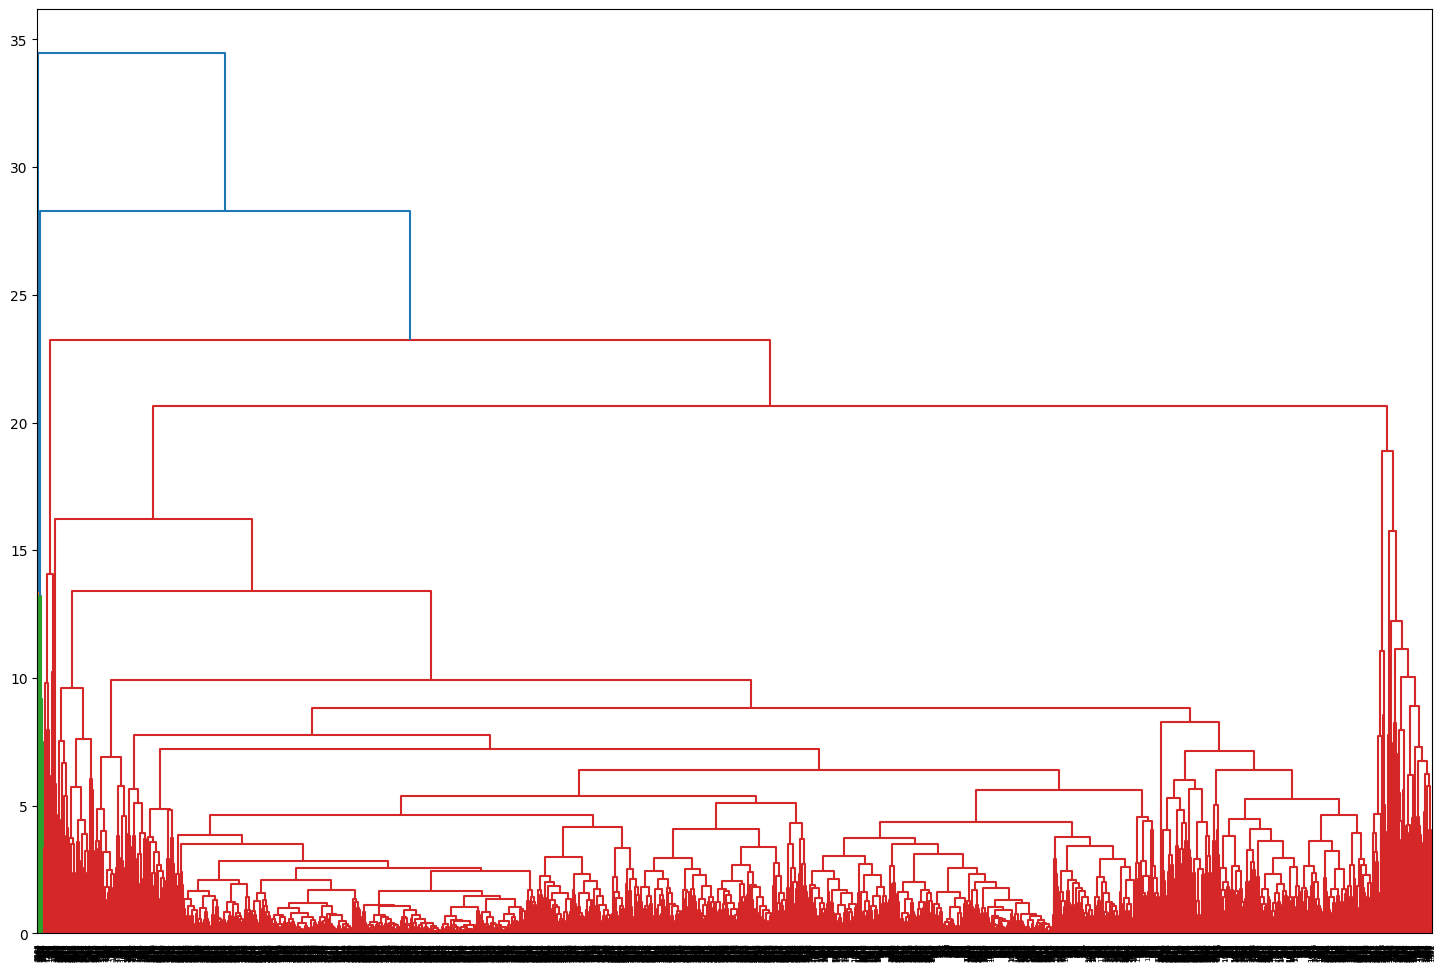

In [29]:
plt.figure(figsize=(18,12))
dendrogram=sch.dendrogram(dm)

In [30]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [31]:
hc=AgglomerativeClustering(n_clusters=8,metric='euclidean',linkage='complete')

In [32]:
hc.fit(df_standard)

AgglomerativeClustering(linkage='complete', n_clusters=8)

In [33]:
df_OG['hc_clusterid']=hc.labels_

In [34]:
df_OG

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


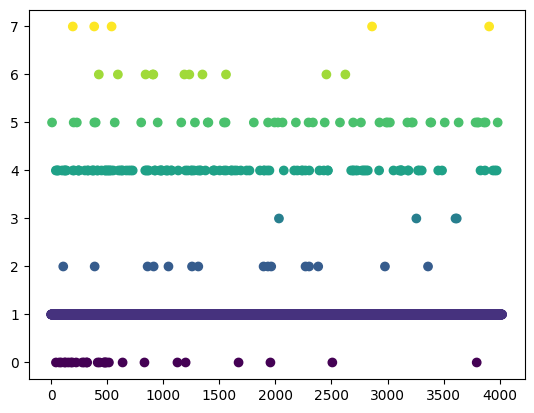

In [35]:
plt.scatter(df_OG['ID'],df_OG['hc_clusterid'], c=df_OG['hc_clusterid'], cmap='viridis')

In [36]:
df_OG.iloc[:,[0,-1]]

,ID,hc_clusterid
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
3994,4017,1
3995,4018,1
3996,4019,1
3997,4020,1


In [37]:
df.groupby(df_OG['hc_clusterid']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
hc_clusterid,,,,,,,,,,,
0,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143
1,65678.996818,112.333068,2.033148,1.000000,1.000796,15572.670910,10.710687,267.476266,0.809069,4068.569345,0.348979
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,131528.147541,348.180328,2.565574,1.000000,1.000000,37762.426230,29.983607,5375.065574,15.581967,4950.565574,0.803279
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,142376.181818,8720.727273,2.181818,1.000000,1.000000,15125.363636,15.454545,1336.454545,4.000000,5349.363636,0.818182
7,180579.200000,0.000000,4.200000,1.000000,1.000000,225128.000000,26.400000,2103.000000,4.800000,4930.800000,1.000000


# **KMeans Clustering**

In [38]:
kmean=KMeans(n_clusters=8,init='k-means++',random_state=0)
kmean.fit(df_standard)

KMeans(random_state=0)

In [39]:
kmean.inertia_

19366.85615674482

In [40]:
inertia=[]
k=list(range(2,15))
for i in k:
  kc=KMeans(n_clusters=i)
  kc.fit(df_standard)
  inertia.append(kc.inertia_)
  print(i,inertia)

2 [35400.66203705586]
3 [35400.66203705586, 30898.393804154188]
4 [35400.66203705586, 30898.393804154188, 27147.250515770917]
5 [35400.66203705586, 30898.393804154188, 27147.250515770917, 25183.091405241357]
6 [35400.66203705586, 30898.393804154188, 27147.250515770917, 25183.091405241357, 24439.565712802432]
7 [35400.66203705586, 30898.393804154188, 27147.250515770917, 25183.091405241357, 24439.565712802432, 19931.13942134998]
8 [35400.66203705586, 30898.393804154188, 27147.250515770917, 25183.091405241357, 24439.565712802432, 19931.13942134998, 18614.948887981915]
9 [35400.66203705586, 30898.393804154188, 27147.250515770917, 25183.091405241357, 24439.565712802432, 19931.13942134998, 18614.948887981915, 16066.051569409889]
10 [35400.66203705586, 30898.393804154188, 27147.250515770917, 25183.091405241357, 24439.565712802432, 19931.13942134998, 18614.948887981915, 16066.051569409889, 15145.161088761084]
11 [35400.66203705586, 30898.393804154188, 27147.250515770917, 25183.091405241357, 24

In [41]:
inertia

[35400.66203705586,
 30898.393804154188,
 27147.250515770917,
 25183.091405241357,
 24439.565712802432,
 19931.13942134998,
 18614.948887981915,
 16066.051569409889,
 15145.161088761084,
 14276.014796318532,
 13714.740537809752,
 13119.89122829254,
 12284.965220686685]

Text(0, 0.5, 'inertea')

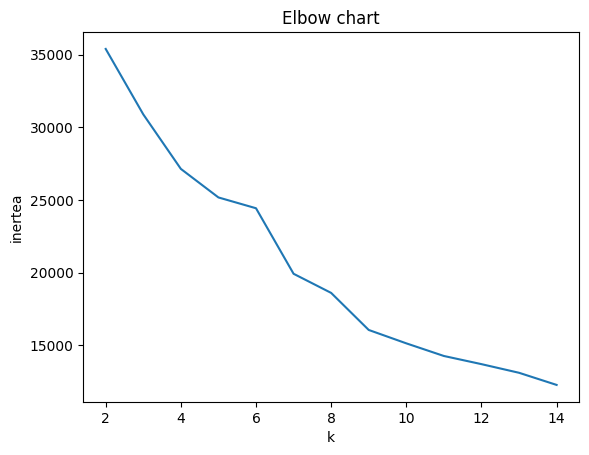

In [42]:
plt.plot(k,inertia)
plt.title("Elbow chart")
plt.xlabel('k')
plt.ylabel('inertea')

In [43]:
kmean_3=KMeans(n_clusters=3,random_state=0)

In [44]:
kmean_3.fit(df_standard)

KMeans(n_clusters=3, random_state=0)

In [45]:
df_OG['Cluster_3']=kmean_3.labels_

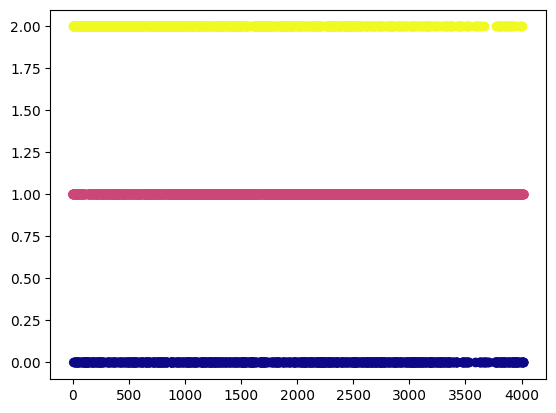

In [46]:
plt.scatter(df_OG['ID'],df_OG['Cluster_3'], c=df_OG['Cluster_3'], cmap='plasma')

In [47]:
kmean_5=KMeans(n_clusters=5,random_state=0)

In [48]:
kmean_5.fit(df_standard)

KMeans(n_clusters=5, random_state=0)

In [49]:
df_OG['Cluster_5']=kmean_5.labels_

In [50]:
df_OG

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,Cluster_3,Cluster_5
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1,1


In [51]:
df.groupby(df_OG['Cluster_5']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_5,,,,,,,,,,,
0,57658.558753,235.242206,1.682254,1.019185,1.000000,10681.802158,10.720624,423.965228,1.299760,4234.488010,0.995204
1,43345.555186,71.054234,1.302569,1.016175,1.000476,4817.452426,7.213606,158.462417,0.475262,3619.639867,0.000000
2,137631.125275,129.841758,4.098901,1.002198,1.002198,47613.570330,19.659341,370.686813,1.132967,5066.916484,0.581319
3,201571.514493,807.449275,2.268116,1.043478,1.000000,34710.615942,28.847826,5856.253623,17.065217,4709.934783,0.826087
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


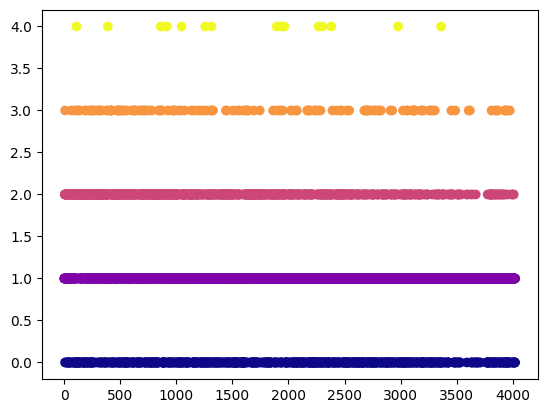

In [52]:
plt.scatter(df_OG['ID'],df_OG['Cluster_5'], c=df_OG['Cluster_5'], cmap='plasma')

In [53]:
kmean_8=KMeans(n_clusters=8,random_state=0)

In [54]:
kmean_8.fit(df_standard)

KMeans(random_state=0)

In [55]:
df_OG['Cluster_8']=kmean_8.labels_

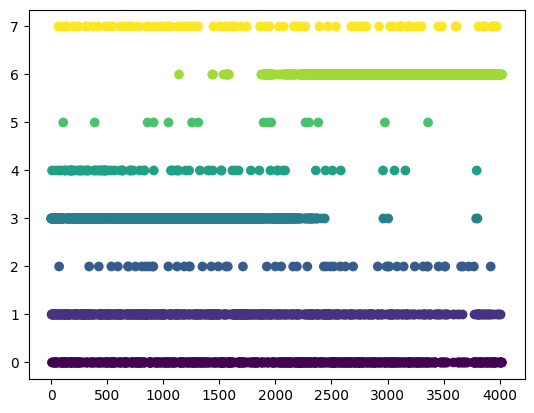

In [57]:
plt.scatter(df_OG['ID'],df_OG['Cluster_8'],c=df_OG['Cluster_8'], cmap='viridis')

In [58]:
df_OG

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,Cluster_3,Cluster_5,Cluster_8
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1,1,6


In [59]:
from sklearn.metrics import silhouette_score

In [60]:
ss_3=silhouette_score(df,kmean_3.labels_)
ss_3

np.float64(0.06191201302661367)

In [61]:
ss_5=silhouette_score(df,kmean_5.labels_)
ss_5

np.float64(0.033766122114991456)

In [62]:
ss_8=silhouette_score(df,kmean_8.labels_)
ss_8

np.float64(-0.043816320940787384)

# **DBSCAN**

In [63]:
df_standard

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


In [64]:
x=df_standard

In [65]:
dbscan_1=DBSCAN(eps=1,min_samples=10)

In [66]:
labels_1=pd.Series(dbscan_1.fit_predict(x)).value_counts()

In [67]:
labels_1

,count
0,2281
1,1033
-1,675
2,10


In [68]:
df_OG['Cluster_DB_1']=dbscan_1.labels_

In [69]:
df_OG

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,Cluster_3,Cluster_5,Cluster_8,Cluster_DB_1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,0,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,0,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,0,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1,1,6,0


In [70]:
silhouette_score(x,dbscan_1.labels_)

np.float64(0.21846817453796322)

In [71]:
dbscan_2=DBSCAN(eps=2,min_samples=10)

In [72]:
labels=pd.Series(dbscan_2.fit_predict(x)).value_counts()

In [73]:
labels

,count
0,2442
1,1304
-1,237
2,16


In [74]:
df_OG['Cluster_DB_2']=dbscan_2.labels_

In [75]:
df_OG

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,Cluster_3,Cluster_5,Cluster_8,Cluster_DB_1,Cluster_DB_2
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1,3,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1,3,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1,3,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1,3,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,2,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,0,0,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,0,0,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,0,0,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1,1,6,0,0
